![alt text](FGV_logo_novo.jpg)

# PANDAS: parte III

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dados/alunos2017.csv')

In [2]:
from IPython.display import Image
Image(url='http://guiadocorpo.com/wp-content/uploads/2015/08/Formula-do-IMC.png')

#### transformando variaveis numericas em categóricas

### Exercicio: 

calcular IMC

In [4]:
df['IMC'] = df.Peso/((df.Altura/100) ** 2)

In [5]:
Image(url='https://viveresano.files.wordpress.com/2010/07/imc.jpg')

vamos transformar o IMC em variavel categorica

In [6]:
df['graus_de_obesidade'] = pd.cut(df.IMC, [0, 18.5, 25, 30, 35, 40, np.inf],
                                 labels = ['baixo', 'normal', 'pre-obeso',
                                          'grau I', 'grau II', 'grau III'])

In [7]:
df.head()

,Atividade_por_semana,Altura,Peso,Time,IMC,graus_de_obesidade
0,4,173,85,Fluminense,28.400548,pre-obeso
1,0,170,70,Flamengo,24.221453,normal
2,2,183,85,NaN,25.381469,pre-obeso
3,4,176,70,Sao Paulo,22.598140,normal
4,9,178,73,Palmeiras,23.040020,normal


#### atribuindo uma coluna para cada valor unico
OHE - one hot encoding

In [8]:
pd.get_dummies(df, columns=['graus_de_obesidade']).head()

,Atividade_por_semana,Altura,Peso,Time,IMC,graus_de_obesidade_baixo,graus_de_obesidade_normal,graus_de_obesidade_pre-obeso,graus_de_obesidade_grau I,graus_de_obesidade_grau II,graus_de_obesidade_grau III
0,4,173,85,Fluminense,28.400548,0,0,1,0,0,0
1,0,170,70,Flamengo,24.221453,0,1,0,0,0,0
2,2,183,85,NaN,25.381469,0,0,1,0,0,0
3,4,176,70,Sao Paulo,22.598140,0,1,0,0,0,0
4,9,178,73,Palmeiras,23.040020,0,1,0,0,0,0


______

### Séries temporais
... infelizmente yahoo, google tem bloqueado sistematicamente ou aleatoriamente esse acesso

In [9]:
# import pandas as pd
import pandas_datareader as web 
from datetime import datetime

# import matplotlib.pyplot as plt
# %matplotlib inline
 
start = datetime(2016,1,1)
end   = datetime(2016,12,31)
end   = datetime.now()

bz = web.DataReader('DEXBZUS', 'fred', start, end)

vamos utilizar esse... Alpha Vantage. por enquanto, gratuito e aberto

In [10]:
import os
import pandas as pd
%matplotlib inline

from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key=os.environ['ALPHA_VANTAGE_KEY'], output_format='pandas')

ativo = 'PETR4.SA'
petr, petr_meta = ts.get_daily(ativo)
petr.index = pd.to_datetime(petr.index)
petr.name = ativo

ativo = 'VALE3.SA'
vale, vale_meta = ts.get_daily(ativo)
vale.index = pd.to_datetime(vale.index)
vale.name = ativo

ativo = '^BVSP'
ibov, ibov_meta = ts.get_daily(ativo)
ibov.index = pd.to_datetime(ibov.index)
ibov.name = ativo

In [11]:
ativos = [df['4. close'].rename(df.name) for df in [petr, vale, ibov]]
ativos = pd.concat(ativos, axis = 1)

ativos = pd.concat([ativos,bz], axis = 1, join = 'inner')

In [12]:
ativos.head()

,PETR4.SA,VALE3.SA,^BVSP,DEXBZUS
2018-01-31,19.70,41.45,84913.0,3.1782
2018-02-01,20.52,41.79,85495.0,3.1718
2018-02-02,19.97,40.80,84041.0,3.2205
2018-02-05,19.04,40.35,81861.0,3.2365
2018-02-06,19.99,42.47,83894.0,3.2535


repare que os índices referem-se a datas (checar com `ativos.index`).

pandas é bastante flexível na indexação e fatiamento de seus objetos, quando os indices referem-se a eventos no tempo.<br>
por exemplo:

* podemos passar um objeto datetime
* podemos passar um string

In [13]:
ativos.loc[datetime(2018,2,26)]

PETR4.SA       21.5200
VALE3.SA       47.4000
^BVSP       87653.0000
DEXBZUS         3.2381
Name: 2018-02-26 00:00:00, dtype: float64

In [14]:
ativos.loc['2018-02-26']

PETR4.SA       21.5200
VALE3.SA       47.4000
^BVSP       87653.0000
DEXBZUS         3.2381
Name: 2018-02-26 00:00:00, dtype: float64

* podemos passar um string incompleto. ex: somente ano/mes

In [15]:
ativos['2018-02']

,PETR4.SA,VALE3.SA,^BVSP,DEXBZUS
2018-02-01,20.52,41.79,85495.0,3.1718
2018-02-02,19.97,40.80,84041.0,3.2205
2018-02-05,19.04,40.35,81861.0,3.2365
2018-02-06,19.99,42.47,83894.0,3.2535
2018-02-07,19.44,41.71,82767.0,3.2620
2018-02-08,19.05,41.59,81533.0,3.2895
2018-02-09,18.77,42.00,80899.0,3.3083
2018-02-14,19.25,44.51,83543.0,3.2551
2018-02-15,19.40,45.95,84291.0,3.2318
2018-02-16,19.42,46.03,84525.0,3.2219


In [16]:
ativos['2018'].head()

,PETR4.SA,VALE3.SA,^BVSP,DEXBZUS
2018-01-31,19.70,41.45,84913.0,3.1782
2018-02-01,20.52,41.79,85495.0,3.1718
2018-02-02,19.97,40.80,84041.0,3.2205
2018-02-05,19.04,40.35,81861.0,3.2365
2018-02-06,19.99,42.47,83894.0,3.2535


* podemos passar uma faixa de dias (ou meses)

In [17]:
ativos['2018-02-15': '2018-03-15']

,PETR4.SA,VALE3.SA,^BVSP,DEXBZUS
2018-02-15,19.40,45.95,84291.0,3.2318
2018-02-16,19.42,46.03,84525.0,3.2219
2018-02-19,20.05,46.45,84793.0,NaN
2018-02-20,20.44,45.51,85804.0,3.2434
2018-02-21,20.25,44.80,86052.0,3.2581
2018-02-22,20.74,45.67,86686.0,3.2579
2018-02-23,21.12,46.08,87293.0,3.2344
2018-02-26,21.52,47.40,87653.0,3.2381
2018-02-27,21.50,47.33,86935.0,3.2472
2018-02-28,21.46,45.05,85481.0,3.2428


#### resample()
`.resample()` permite criar objetos agrupados baseados em períodos. Pense como um groupby, mas ao invés de grupos montados sobre valores únicos, aqui são grupos montados a partir de datas contidas em períodos sem sobreposição.<br>
Por exemplo, se quisermos checar os valores médios semanais, basta utilizar:

In [18]:
ativos['2018-02'].resample('W').mean()

,PETR4.SA,VALE3.SA,^BVSP,DEXBZUS
2018-02-04,20.245000,41.295000,84768.000000,3.196150
2018-02-11,19.258000,41.624000,82190.800000,3.269960
2018-02-18,19.356667,45.496667,84119.666667,3.236267
2018-02-25,20.520000,45.702000,86125.600000,3.248450
2018-03-04,21.493333,46.593333,86689.666667,3.242700


se quisermos os valores médios mensais:

In [19]:
ativos['2018'].resample('M').mean()

,PETR4.SA,VALE3.SA,^BVSP,DEXBZUS
2018-01-31,19.700000,41.450000,84913.000000,3.178200
2018-02-28,20.107222,44.193889,84641.444444,3.245459
2018-03-31,21.693810,42.334762,85197.095238,3.277752
2018-04-30,21.617143,45.691429,85032.190476,3.408886
2018-05-31,23.284286,51.821905,82295.000000,3.633100
2018-06-30,15.629375,51.051250,73049.937500,3.754988


### exercicios

criar um grafico do ativo `^BVSP` com os valores diários, as médias mensais e as médias móveis de 7 dias

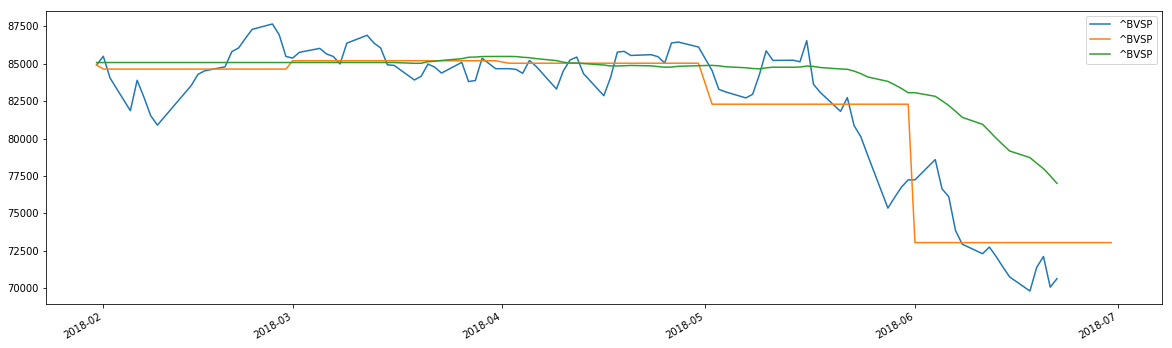

In [20]:
pd.concat([ativos, ativos.resample('M').mean(), 
           ativos.rolling(window = 30).mean()], axis = 1).fillna(method = 'bfill')['^BVSP'].plot(figsize = (20,6))

______
______
______